# <span style="color:cornflowerblue"><center> Numerical Simulation Laboratory</center></span>
## <span style="color:cornflowerblue"><center> Samuele Brambilla - Notebook 2</center></span>

### Exercise 02.1 - Monte Carlo integration
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Show a picture of both your estimations of $I$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure
from matplotlib import ticker

unif_prog, unif_error, badsimp_prog, badsimp_error, simp_prog, simp_error = np.loadtxt( "Data1.csv" , dtype = float , delimiter = "," , usecols=(0,1,2,3,4,5) , unpack='true')

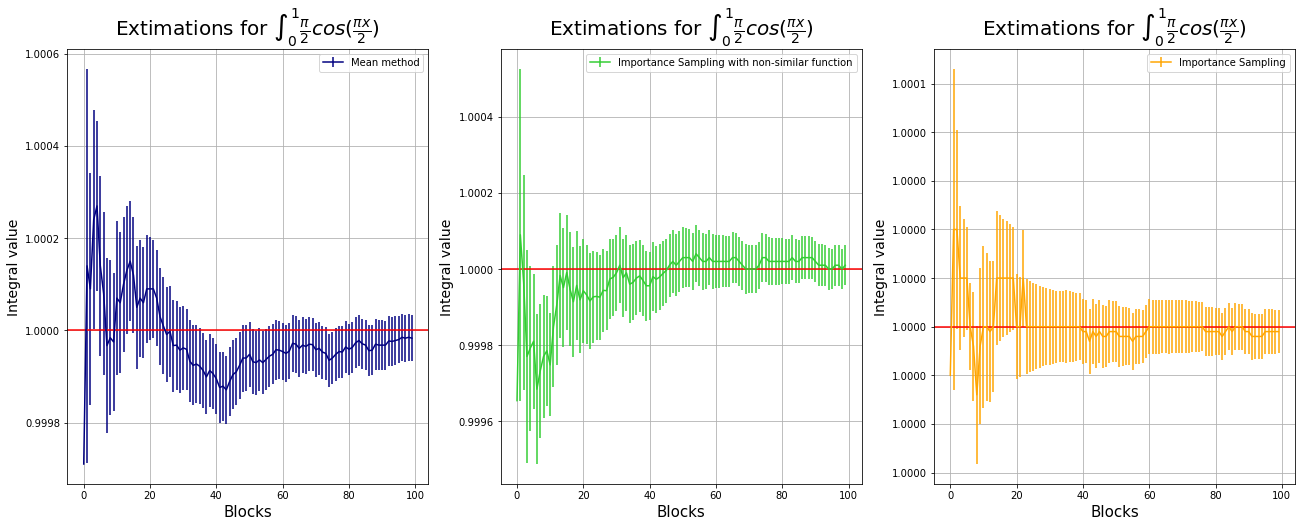

In [2]:
fig, [ax0 , ax1 , ax2 ]   = plt.subplots(1, 3, figsize=(22 , 8))
ax0.errorbar( np.arange(len(unif_prog)) , unif_prog , yerr=unif_error , color="navy" , label="Mean method" )
ax1.errorbar( np.arange(len(badsimp_prog)), badsimp_prog , yerr=badsimp_error , color="limegreen" , label="Importance Sampling with non-similar function")
ax2.errorbar( np.arange(len(simp_prog)), simp_prog , yerr=simp_error, color="orange" , label="Importance Sampling")

#r before label text allows in line LateX
for i in range(3):
    globals()['ax'+str(i)].set_title(r'Extimations for $\int_0 ^1 \frac{\pi}{2} cos(\frac{\pi x}{2})$' , fontsize = 20)
    globals()['ax'+str(i)].set_ylabel('Integral value', fontsize = 14)
    globals()['ax'+str(i)].set_xlabel('Blocks', fontsize = 15)
    globals()['ax'+str(i)].legend()
    globals()['ax'+str(i)].grid(True)
    globals()['ax'+str(i)].axhline(1, color ="red", label = "expected value")
    globals()['ax'+str(i)].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.4f}"))

I tre grafici mostrano la stima dell'integrale all'aumentare del numero di valori su cui viene mediato il risultato. Le stime riportate nei grafici e il relativo errore sono state calcolate con il metodo della media a blocchi. Il totale di valutazioni dell'integrale in ogni metodo è $10^8$.

Nel primo grafico l'integrazione è stata eseguita utilizzando il metodo della media, una tecnica Monte Carlo in cuiviene campionata una distribuzione di probabilità uniforme per il calcolo dell'integrale.

Nel secondo grafico ho applicato il metodo dell'importance sampling usando la distribuzione $p(x) = 2cos^2(\frac{\pi}{2}x)$.<br>
Il risultato non è ottimale, è evidente dai grafici che non è stata ottenuta una significativa riduzione della varianza, questo perchè la distribuzione campionata non è simile all'integranda.

Il terzo grafico riporta il calcolo dell'integrale, ancora con il metodo di importance sampling, usando la distribuzione $p(x) = \frac{3}{2}(1-x^2)$. <br>
Come mostrato dal grafico, questa volta i valori oscillano molto meno attorno al valor medio e la varianza è considerevolmente ridotta. Questo è dovuto al fatto che la distribuzione usata è molto simile simile allo sviluppo di Taylor dell'integranda.

Per campionare entrambe le distribuzioni usate nel metodo di importance sampling ho utilizzato il metodo di accept-reject in quanto il metodo di funzione inversa non può essere applicato su tutte le distribuzioni: è necessario che queste siano invertibili.
Il metodo di accept-reject riduce l'efficienza dell'algoritmo ma il costo del metodo l'importance sampling rimane comunque minore di un ordine di grandezza rispetto a quello del metodo della media.<br>I relativi costi sono riportati sotto e sono stati calcolati come tempo totale impiegato dal metodo moltiplicato per l'errore dell'ultimo blocco.

In [3]:
unif_cost , simp_cost = np.loadtxt( "Costi.csv" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
print("costo del metodo della media:\t", f"{unif_cost:.5e}")
print("costo metodo di importance sampling:\t", f"{simp_cost:.5e}")

costo del metodo della media:	 1.90875e-04
costo metodo di importance sampling:	 3.36522e-05


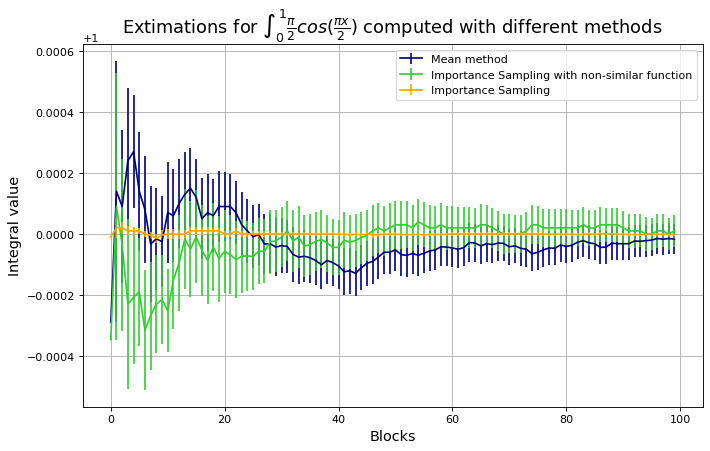

In [3]:
figure(figsize=(10,6), dpi=80)
plt.errorbar( np.arange(len(unif_prog)) , unif_prog , yerr=unif_error , color="navy" , label="Mean method" )
plt.errorbar( np.arange(len(badsimp_prog)), badsimp_prog , yerr=badsimp_error , color="limegreen" , label="Importance Sampling with non-similar function" )
plt.errorbar( np.arange(len(simp_prog)), simp_prog , yerr=simp_error, color="orange" , label="Importance Sampling" )
#plt.axhline(1, color ="red", label = "expected value")
plt.xlabel('Blocks', fontsize = 13)
plt.ylabel('Integral value', fontsize = 13)
plt.title(r'Extimations for $\int_0 ^1 \frac{\pi}{2} cos(\frac{\pi x}{2})$ computed with different methods' , fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()

In questo grafico ho riportato gli stessi tre grafici precedenti, sovrapponendoli in modo che le differenze siano meglio apprezzabili. Come anticipato, non si vede una differenza significatriva tra il metodo della media (blu) e l'importance sampling con una distribuzione non simile all'integranda (verde).<br>Nel terzo caso invece è molto netto il miglioramento sia della stima dell'integrale, molto meno oscillante e più vicina al valore vero, sia della varianza, che è notevolmente ridotta.

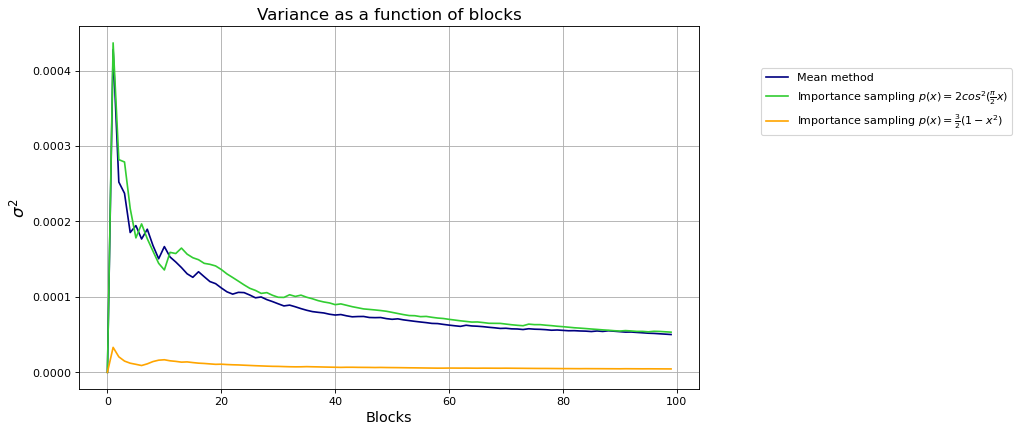

In [5]:
figure(figsize=(10,6), dpi=80) 
plt.plot(np.arange(len(unif_prog)) ,unif_error , color="navy", label="Mean method" )
plt.plot(np.arange(len(badsimp_prog)) ,badsimp_error , color="limegreen" , label=r"Importance sampling $p(x)=2 cos^2(\frac{\pi}{2}x)$")
plt.plot(np.arange(len(simp_prog)) ,simp_error , color="orange", label=r"Importance sampling $p(x)=\frac{3}{2}(1-x^2)$")
plt.xlabel('Blocks', fontsize = 13)
plt.ylabel('$\sigma^2$', fontsize = 15)
plt.title("Variance as a function of blocks", fontsize = 15)
plt.grid(True)
plt.legend(loc=(1.1 , 0.7))

Ho riportato in questo grafico le varianze nei 100 blocchi in cui è stato suddiviso il totale di  punti generati per la stima dell'integrale in modo da rendere ancora più evidente quanto la distribuzione $p(x) = \frac{3}{2}(1-x^2)$ sia efficacie ai fini di ridurre la varianza.<br>Per quanto riguarda invece la distribuzione $p(x) = 2cos^2(\frac{\pi}{2}x)$, all'aumentare del numero di tiri la varianza tende a coincidere con quella del metodo della media, risultato non auspicabile dato che l'obiettivo dell'importance sampling è la riduzione della varianza.

### Exercise 02.2 - Random Walks in lattice and continuum
- 3D Random Walks (RW) on a cubic lattice and in the continuum: Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

In [6]:
dist , errors , dist_cont , errors_cont = np.loadtxt( "Data2.csv" , dtype = float , delimiter = "," , usecols=(0,1,2,3) , unpack='true')

optimized parameters [a , a'] =
[ 1.0002519459595278 ,  1.0000107302849046 ]
parameters uncertainty =
[ [0.00013688] , [0.0001376] ]


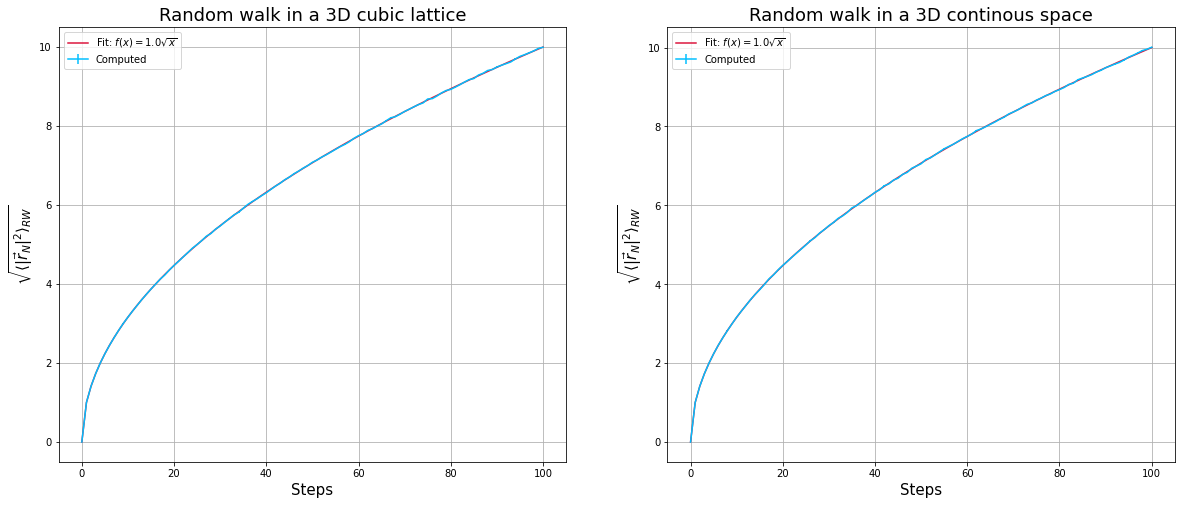

In [15]:
fig, (ax0 , ax1)   = plt.subplots(1, 2, figsize=(20 , 8))
#r before label text allows in line LateX
ax0.errorbar( np.arange(len(dist)) , dist, yerr= errors ,color="deepskyblue", label="Computed" )
ax1.errorbar( np.arange(len(dist_cont)) , dist_cont , yerr= errors_cont ,color="deepskyblue", label="Computed" )

ax0.set_xlabel('Steps', fontsize = 15)
ax0.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$' , fontsize = 15)
ax0.set_title("Random walk in a 3D cubic lattice" , fontsize = 18)

ax1.set_xlabel('Steps', fontsize = 15)
ax1.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$' , fontsize = 15)
ax1.set_title("Random walk in a 3D continous space" , fontsize = 18)

ax0.grid(True)
ax1.grid(True)


#fitting the curve 

def f(x,a):  # defining the fitting function
    return a * np.sqrt(x) 

x = np.arange(len(dist)) #len(dist) = len(dist_cont)101, steps go from 0 to 100

#fitting for random walk in lattice 
p_opt, p_cov = curve_fit(f, x, dist)
    #curve_fit(fitting function, indipendent variable, variable to be fitted)
    #returns p_opt, an array with the optimised parameters of the fitting function 
    #and p_cov, a 2D array with the extimated variance, to compute the std use np.sqrt(np.diagonal(p_cov))
y_fit_lattice = f(x,p_opt[0])
ax0.plot(x, y_fit_lattice , color="crimson" , label = "Fit: $f(x)= $"+str(np.around(p_opt[0],3))+"$ \sqrt{x}$") 

#fitting for continous random walk
p_opt2, p_cov2 = curve_fit(f, x, dist_cont)
y_fit_cont = f(x,p_opt2[0])
ax1.plot(x, y_fit_cont , color="crimson" , label = "Fit: $f(x)= $"+str(np.around(p_opt2[0],3))+"$ \sqrt{x}$") 

ax0.legend()
ax1.legend()

print("optimized parameters [a , a'] =")
print("[" , p_opt[0] ,", " ,  p_opt2[0] , "]")
print("parameters uncertainty =")
print("[" , np.sqrt(np.diagonal(p_cov)) , "," , np.sqrt(np.diagonal(p_cov2)) , "]" )

I grafici riportano la distanza quadratica media del random walk dall'origine in funzione del numero di passi compiuti. La media per ogni passo è stata calcolata con il metodo a blocchi usando $M=10^5$ simulazioni e $N=100$ blocchi. Il numero di passi cresce da $0$ a $100$. Nel primo caso il random walk è vincolato ad un reticolo cubico, mentre nel secondo grafico il random walk si trova nel continuo. In entrambi i casi la lunghezza del passo è la stessa $a = 1$.

La distribuzione di probabilità del punto finale del random walk rispetta l'equazione di diffusione:
$$\displaystyle \frac{\partial \rho}{\partial t} = D\nabla^2\rho$$
in questo caso vale $D=\frac{a^2}{2\tau}$, con a la lunghezza del passo e $\tau$ il tempo che intercorre tra ogni step.

L'equazione di diffusione si può risolvere semplicemente imponendo una condizione iniziale, nel nostro caso la partenza dall'origine, e passando in spazio di Fourier. Si osserva che la distribuzione di probabilità della posizione finale del cammino è una gaussiana centrata nell'origine con deviazione standard
$$\sigma = \sqrt{2Dt} = \sqrt{2\frac{a^2}{2\tau}N\tau}=\sqrt{N}$$
come troviamo in entrambe le simulazioni.

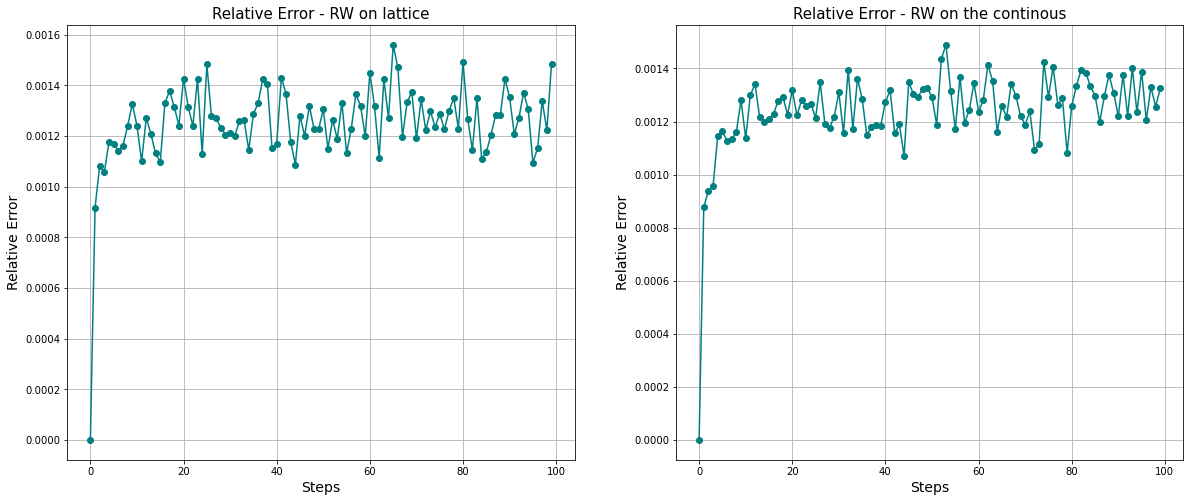

In [16]:
fig, (ax0 , ax1)   = plt.subplots(1, 2, figsize=(20 , 8))
x = np.arange(len(errors)-1)
err_perc = np.divide(errors[1:], dist[1:])
err_perc_cont = np.divide(errors_cont[1:], dist_cont[1:])

ax0.plot(x,err_perc, c="teal", marker="o")
ax0.set_xlabel('Steps', fontsize = 14)
ax0.set_ylabel('Relative Error', fontsize = 14)
ax0.set_title("Relative Error - RW on lattice", fontsize = 15)
ax0.grid(True)

ax1.plot(x,err_perc_cont, c="teal", marker="o")
ax1.set_xlabel('Steps', fontsize = 14)
ax1.set_ylabel('Relative Error', fontsize = 14)
ax1.set_title("Relative Error - RW on the continous", fontsize = 15)
ax1.grid(True)

I grafici raffigurano l'andamento dell'errore relativo per entrambi i tipi di random walk: come da ipotesi, l'errore relativo rimane pressochè costante all'aumentare del numero di steps.<br>
Ho scelto di riportare l'errore in quanto nei grafici precedenti l'errore non poteva essere ben visualizzato perchè troppo piccolo.